# Pandas 

In [1]:
%load_ext watermark

In [2]:
%watermark -a "E. Kaan Ulgen" -p numpy,scipy,matplotlib,pandas

E. Kaan Ulgen 

numpy 1.16.2
scipy 1.2.0
matplotlib 3.1.0
pandas 1.0.4


In [3]:
from IPython.display import Image
%matplotlib inline

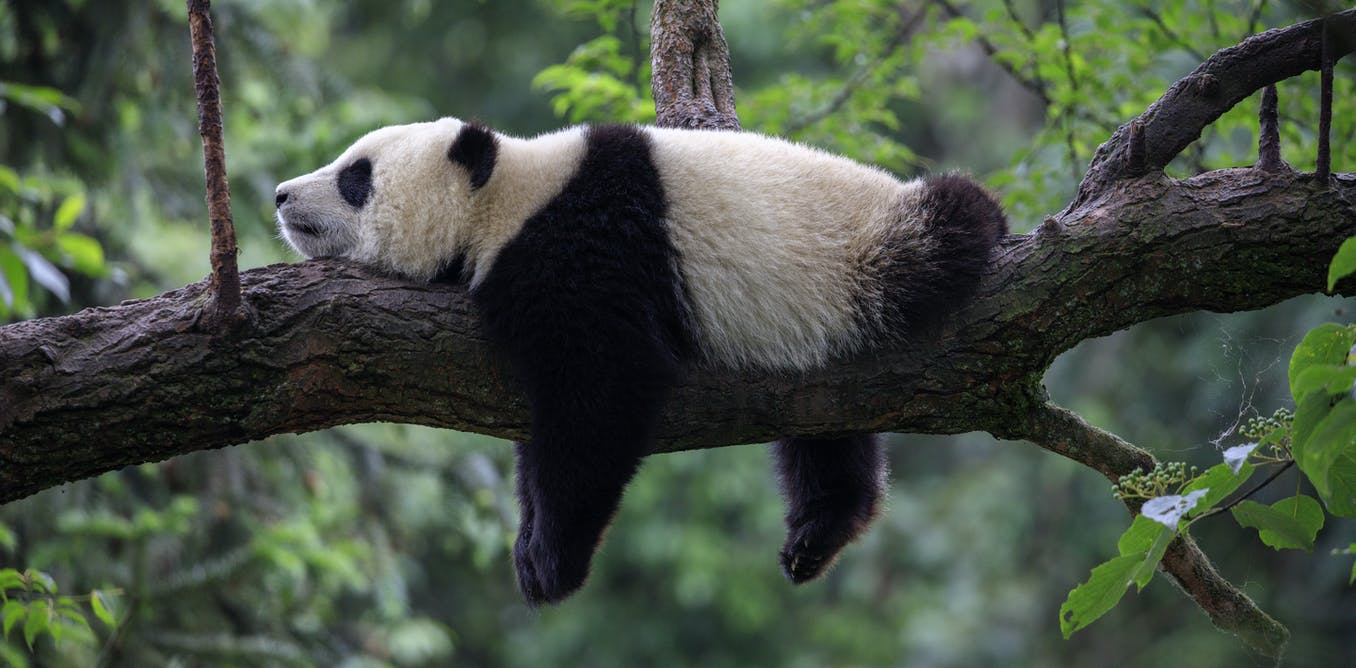

In [4]:
Image(filename='./pandas.jpg', width=400)

## 1.1 Temel Özellikler

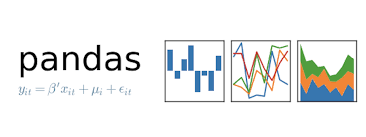

In [5]:
Image(filename='./pandas.png', width=400)

- Günümüzde veri analizi için kullanılan en güçlü araçlardandır. Numpy ve Matplotlib kütüphaneleri üzerine kurulur.
- Dezavantajı, kütüphanenin paralel programlama alt yapısı desteklemiyor olmasıdır. Dolayısıyla yapacağınız işlemlerin performansı makinanızın gücüyle doğru orantılıdır.
- İki temel veri yapısı sunar:
    - Veri Çerçevesi (DataFrame)
    - Seri (Series)    
- Seriler, tek boyutlu diziler şeklinde verilerin tutulması ve üzerlerinde işlem yapılmasını sağlar.
- Veri Çerçeveleri ise 2 boyutlu olarak da tablo yapısını barındırır. 
- Veriler üzerinde kolayca filtreleme yapılabilir, tablo biçimi değiştirilebilir.
- Birçok veri formatı desteklenmektedir. Örneğin, csv, excel, json, ascii ...
- Eksik değerleri doldurmak ve çıkarmak için yöntemler mevcut.
- Farklı türlerde grafikler çizdirilebilir.
- Groupby fonksiyonu sayesinde veri gruplara bölünebilir. 

### 1.1.1 Veri Çerçevesi (DataFrame)

In [6]:
import pandas
pandas.__version__

'1.0.4'

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

- **Veri Çerçevesi Oluşturmak**

In [8]:
col = ['isim', 'yas', 'cinsiyet', 'meslek']
df1 = pd.DataFrame([['ahmet', 19, "E", "Ogrenci"], ['Ayse', 26, "K", "Ogrenci"]], columns=col)
print(df1)

    isim  yas cinsiyet   meslek
0  ahmet   19        E  Ogrenci
1   Ayse   26        K  Ogrenci


In [9]:
df1.head() #ilk 5 satır

,isim,yas,cinsiyet,meslek
0,ahmet,19,E,Ogrenci
1,Ayse,26,K,Ogrenci


In [10]:
df1.tail() #son 5 satır

,isim,yas,cinsiyet,meslek
0,ahmet,19,E,Ogrenci
1,Ayse,26,K,Ogrenci


In [11]:
df2 = pd.DataFrame([['Kemal', 22, "E", "Ogrenci"], ['Elif', 58, "K", "Yonetici"]], columns=col)
df2.head()

,isim,yas,cinsiyet,meslek
0,Kemal,22,E,Ogrenci
1,Elif,58,K,Yonetici


In [12]:
df3 = pd.DataFrame(dict(isim=['Mehmet', 'Ebru'], yas=[33, 44], cinsiyet=['E', 'K'], meslek=['Muhendis', 'Avukat']))
df3.head()

,isim,yas,cinsiyet,meslek
0,Mehmet,33,E,Muhendis
1,Ebru,44,K,Avukat


- **Veri Çevrelerinin Birleştirilmesi**
    - Concatenate
    - Join 

   - **Concatenate**

In [13]:
df1.append(df2)

,isim,yas,cinsiyet,meslek
0,ahmet,19,E,Ogrenci
1,Ayse,26,K,Ogrenci
0,Kemal,22,E,Ogrenci
1,Elif,58,K,Yonetici


In [14]:
df1

,isim,yas,cinsiyet,meslek
0,ahmet,19,E,Ogrenci
1,Ayse,26,K,Ogrenci


In [15]:
df = pd.concat([df1, df2, df3])
df.head(6)

,isim,yas,cinsiyet,meslek
0,ahmet,19,E,Ogrenci
1,Ayse,26,K,Ogrenci
0,Kemal,22,E,Ogrenci
1,Elif,58,K,Yonetici
0,Mehmet,33,E,Muhendis
1,Ebru,44,K,Avukat


   - **Join**

In [16]:
df4 = pd.DataFrame(dict(isim=["Mehmet", "Ebru", "Kemal", "ahmet"], boy=[175, 165, 180, 172]))
df4.head()

,isim,boy
0,Mehmet,175
1,Ebru,165
2,Kemal,180
3,ahmet,172


In [17]:
merge = pd.merge(df, df4, on="isim", how="inner")
merge.head()

,isim,yas,cinsiyet,meslek,boy
0,ahmet,19,E,Ogrenci,172
1,Kemal,22,E,Ogrenci,180
2,Mehmet,33,E,Muhendis,175
3,Ebru,44,K,Avukat,165


In [18]:
df = pd.merge(df, df4, on="isim", how="outer")
df.head(10)

,isim,yas,cinsiyet,meslek,boy
0,ahmet,19,E,Ogrenci,172.0
1,Ayse,26,K,Ogrenci,NaN
2,Kemal,22,E,Ogrenci,180.0
3,Elif,58,K,Yonetici,NaN
4,Mehmet,33,E,Muhendis,175.0
5,Ebru,44,K,Avukat,165.0


In [19]:
pd.merge?

- **Özetleme**

In [20]:
type(df)

pandas.core.frame.DataFrame

In [21]:
df.head(10) #İlk 5 Satır

,isim,yas,cinsiyet,meslek,boy
0,ahmet,19,E,Ogrenci,172.0
1,Ayse,26,K,Ogrenci,NaN
2,Kemal,22,E,Ogrenci,180.0
3,Elif,58,K,Yonetici,NaN
4,Mehmet,33,E,Muhendis,175.0
5,Ebru,44,K,Avukat,165.0


In [22]:
df.tail() #Son 5 Satır

,isim,yas,cinsiyet,meslek,boy
1,Ayse,26,K,Ogrenci,NaN
2,Kemal,22,E,Ogrenci,180.0
3,Elif,58,K,Yonetici,NaN
4,Mehmet,33,E,Muhendis,175.0
5,Ebru,44,K,Avukat,165.0


In [23]:
df.index

Int64Index([0, 1, 2, 3, 4, 5], dtype='int64')

In [24]:
df.columns #Kolon/Sütun isimleri

Index(['isim', 'yas', 'cinsiyet', 'meslek', 'boy'], dtype='object')

In [25]:
df.dtypes #Herbir kolonun veri tipi

isim         object
yas           int64
cinsiyet     object
meslek       object
boy         float64
dtype: object

In [26]:
df.shape #Veri çerçevesinin satır ve sütun sayısı

(6, 5)

In [27]:
df.values 

array([['ahmet', 19, 'E', 'Ogrenci', 172.0],
       ['Ayse', 26, 'K', 'Ogrenci', nan],
       ['Kemal', 22, 'E', 'Ogrenci', 180.0],
       ['Elif', 58, 'K', 'Yonetici', nan],
       ['Mehmet', 33, 'E', 'Muhendis', 175.0],
       ['Ebru', 44, 'K', 'Avukat', 165.0]], dtype=object)

In [28]:
df.info() # Kısa Özet

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   isim      6 non-null      object 
 1   yas       6 non-null      int64  
 2   cinsiyet  6 non-null      object 
 3   meslek    6 non-null      object 
 4   boy       4 non-null      float64
dtypes: float64(1), int64(1), object(3)
memory usage: 288.0+ bytes


In [29]:
df.describe() #Temel istatiksel sonuçlar

,yas,boy
count,6.000000,4.000000
mean,33.666667,173.000000
std,14.895189,6.271629
min,19.000000,165.000000
25%,23.000000,170.250000
50%,29.500000,173.500000
75%,41.250000,176.250000
max,58.000000,180.000000


In [30]:
df.describe().T #temel istatiksel sonuçların transpoze edilmiş gösterimi

,count,mean,std,min,25%,50%,75%,max
yas,6.0,33.666667,14.895189,19.0,23.00,29.5,41.25,58.0
boy,4.0,173.000000,6.271629,165.0,170.25,173.5,176.25,180.0


- **Kolon Seçimi**

In [31]:
df["isim"]

0     ahmet
1      Ayse
2     Kemal
3      Elif
4    Mehmet
5      Ebru
Name: isim, dtype: object

In [32]:
df.isim

0     ahmet
1      Ayse
2     Kemal
3      Elif
4    Mehmet
5      Ebru
Name: isim, dtype: object

In [33]:
df[["isim","meslek","boy"]]

,isim,meslek,boy
0,ahmet,Ogrenci,172.0
1,Ayse,Ogrenci,NaN
2,Kemal,Ogrenci,180.0
3,Elif,Yonetici,NaN
4,Mehmet,Muhendis,175.0
5,Ebru,Avukat,165.0


- **Satır Seçimi**
    - iloc, ix (eski versiyonlarda mevcut, 1.0.0 itibaren kaldırıldı)

  - iloc

In [34]:
df2 = df.copy()

In [35]:
df2.iloc[0] #İlk Satır

isim          ahmet
yas              19
cinsiyet          E
meslek      Ogrenci
boy             172
Name: 0, dtype: object

In [36]:
df2.iloc[0, 0] #İlk satır, ilk değer

'ahmet'

In [37]:
df2.head()

,isim,yas,cinsiyet,meslek,boy
0,ahmet,19,E,Ogrenci,172.0
1,Ayse,26,K,Ogrenci,NaN
2,Kemal,22,E,Ogrenci,180.0
3,Elif,58,K,Yonetici,NaN
4,Mehmet,33,E,Muhendis,175.0


In [38]:
df2.iloc[0, 1] = 55

In [39]:
df2

,isim,yas,cinsiyet,meslek,boy
0,ahmet,55,E,Ogrenci,172.0
1,Ayse,26,K,Ogrenci,NaN
2,Kemal,22,E,Ogrenci,180.0
3,Elif,58,K,Yonetici,NaN
4,Mehmet,33,E,Muhendis,175.0
5,Ebru,44,K,Avukat,165.0


In [40]:
df2.shape[0]

6

In [41]:
for i in range(df.shape[0]):
    row = df2.iloc[i]
    row.yas *= 100
    print(row)
df2.head()

isim          ahmet
yas            5500
cinsiyet          E
meslek      Ogrenci
boy             172
Name: 0, dtype: object
isim           Ayse
yas            2600
cinsiyet          K
meslek      Ogrenci
boy             NaN
Name: 1, dtype: object
isim          Kemal
yas            2200
cinsiyet          E
meslek      Ogrenci
boy             180
Name: 2, dtype: object
isim            Elif
yas             5800
cinsiyet           K
meslek      Yonetici
boy              NaN
Name: 3, dtype: object
isim          Mehmet
yas             3300
cinsiyet           E
meslek      Muhendis
boy              175
Name: 4, dtype: object
isim          Ebru
yas           4400
cinsiyet         K
meslek      Avukat
boy            165
Name: 5, dtype: object


/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,isim,yas,cinsiyet,meslek,boy
0,ahmet,55,E,Ogrenci,172.0
1,Ayse,26,K,Ogrenci,NaN
2,Kemal,22,E,Ogrenci,180.0
3,Elif,58,K,Yonetici,NaN
4,Mehmet,33,E,Muhendis,175.0


In [42]:
df.head()

,isim,yas,cinsiyet,meslek,boy
0,ahmet,19,E,Ogrenci,172.0
1,Ayse,26,K,Ogrenci,NaN
2,Kemal,22,E,Ogrenci,180.0
3,Elif,58,K,Yonetici,NaN
4,Mehmet,33,E,Muhendis,175.0


- **Satır Seçimi/Filtreleme**

In [43]:
df[df.yas<20]

,isim,yas,cinsiyet,meslek,boy
0,ahmet,19,E,Ogrenci,172.0


In [44]:
df[df.yas<20][["isim","meslek","boy"]]

,isim,meslek,boy
0,ahmet,Ogrenci,172.0


In [45]:
df[(df.yas>20) & (df.cinsiyet=="E")]

,isim,yas,cinsiyet,meslek,boy
2,Kemal,22,E,Ogrenci,180.0
4,Mehmet,33,E,Muhendis,175.0


In [46]:
df[df.meslek.isin(["Ogrenci","Muhendis"])]

,isim,yas,cinsiyet,meslek,boy
0,ahmet,19,E,Ogrenci,172.0
1,Ayse,26,K,Ogrenci,NaN
2,Kemal,22,E,Ogrenci,180.0
4,Mehmet,33,E,Muhendis,175.0


- **Sıralama**

In [47]:
df3 = df.copy()

In [48]:
df3.yas.sort_values()

0    19
2    22
1    26
4    33
5    44
3    58
Name: yas, dtype: int64

In [49]:
df3.sort_values(by="yas")

,isim,yas,cinsiyet,meslek,boy
0,ahmet,19,E,Ogrenci,172.0
2,Kemal,22,E,Ogrenci,180.0
1,Ayse,26,K,Ogrenci,NaN
4,Mehmet,33,E,Muhendis,175.0
5,Ebru,44,K,Avukat,165.0
3,Elif,58,K,Yonetici,NaN


In [50]:
df3.sort_values(by="yas", ascending=False)

,isim,yas,cinsiyet,meslek,boy
3,Elif,58,K,Yonetici,NaN
5,Ebru,44,K,Avukat,165.0
4,Mehmet,33,E,Muhendis,175.0
1,Ayse,26,K,Ogrenci,NaN
2,Kemal,22,E,Ogrenci,180.0
0,ahmet,19,E,Ogrenci,172.0


In [51]:
df3.sort_values(by=["meslek", "yas"])

,isim,yas,cinsiyet,meslek,boy
5,Ebru,44,K,Avukat,165.0
4,Mehmet,33,E,Muhendis,175.0
0,ahmet,19,E,Ogrenci,172.0
2,Kemal,22,E,Ogrenci,180.0
1,Ayse,26,K,Ogrenci,NaN
3,Elif,58,K,Yonetici,NaN


In [52]:
df3.head(6)

,isim,yas,cinsiyet,meslek,boy
0,ahmet,19,E,Ogrenci,172.0
1,Ayse,26,K,Ogrenci,NaN
2,Kemal,22,E,Ogrenci,180.0
3,Elif,58,K,Yonetici,NaN
4,Mehmet,33,E,Muhendis,175.0
5,Ebru,44,K,Avukat,165.0


In [53]:
df3.sort_values(by="yas", inplace=True)
df3.head(6)

,isim,yas,cinsiyet,meslek,boy
0,ahmet,19,E,Ogrenci,172.0
2,Kemal,22,E,Ogrenci,180.0
1,Ayse,26,K,Ogrenci,NaN
4,Mehmet,33,E,Muhendis,175.0
5,Ebru,44,K,Avukat,165.0
3,Elif,58,K,Yonetici,NaN


- **Tanımlayıcı İstatistikler**

In [54]:
df3.describe()

,yas,boy
count,6.000000,4.000000
mean,33.666667,173.000000
std,14.895189,6.271629
min,19.000000,165.000000
25%,23.000000,170.250000
50%,29.500000,173.500000
75%,41.250000,176.250000
max,58.000000,180.000000


In [55]:
df3.describe(include="all")

,isim,yas,cinsiyet,meslek,boy
count,6,6.000000,6,6,4.000000
unique,6,NaN,2,4,NaN
top,Ebru,NaN,E,Ogrenci,NaN
freq,1,NaN,3,3,NaN
mean,NaN,33.666667,NaN,NaN,173.000000
std,NaN,14.895189,NaN,NaN,6.271629
min,NaN,19.000000,NaN,NaN,165.000000
25%,NaN,23.000000,NaN,NaN,170.250000
50%,NaN,29.500000,NaN,NaN,173.500000
75%,NaN,41.250000,NaN,NaN,176.250000


In [56]:
df3.groupby("meslek")["yas"].mean()

meslek
Avukat      44.000000
Muhendis    33.000000
Ogrenci     22.333333
Yonetici    58.000000
Name: yas, dtype: float64

In [57]:
df3.groupby("meslek")["yas"].median()

meslek
Avukat      44
Muhendis    33
Ogrenci     22
Yonetici    58
Name: yas, dtype: int64

In [58]:
veri = {
'İsim':["Mehmet", "Ebru", "Bekir", "Can", "Cansu", "Kaan", "Süleyman", "Oğuz","Ayşe","Umit"],
'Yaş':[22,23,22,21,25,26,22,21,20,22],  'Basvuru':["Adalet","Fizik","Fizik","Hukuk","Hemşire","İnşaat","Bilgisayar","İstatistik","Matematik","Biyoloji"],
'SınavSonuc':[45,50,30,20,95,100,79,82,63,38],
'Tecrube(yıl)':[0,1,1,None,3,4,0,None,None,2]}
df_ = pd.DataFrame(veri)
df_.head(10)

,İsim,Yaş,Basvuru,SınavSonuc,Tecrube(yıl)
0,Mehmet,22,Adalet,45,0.0
1,Ebru,23,Fizik,50,1.0
2,Bekir,22,Fizik,30,1.0
3,Can,21,Hukuk,20,NaN
4,Cansu,25,Hemşire,95,3.0
5,Kaan,26,İnşaat,100,4.0
6,Süleyman,22,Bilgisayar,79,0.0
7,Oğuz,21,İstatistik,82,NaN
8,Ayşe,20,Matematik,63,NaN
9,Umit,22,Biyoloji,38,2.0


In [59]:
df_.describe().T

,count,mean,std,min,25%,50%,75%,max
Yaş,10.0,22.400000,1.837873,20.0,21.25,22.0,22.75,26.0
SınavSonuc,10.0,60.200000,27.863955,20.0,39.75,56.5,81.25,100.0
Tecrube(yıl),7.0,1.571429,1.511858,0.0,0.50,1.0,2.50,4.0


In [60]:
df_.corr() #Korelasyon Matrisi

,Yaş,SınavSonuc,Tecrube(yıl)
Yaş,1.000000,0.577573,0.883184
SınavSonuc,0.577573,1.000000,0.598001
Tecrube(yıl),0.883184,0.598001,1.000000


- **Ayrık Verilerin Dışlanması**

In [61]:
np.random.seed(1)
df_outlier = pd.DataFrame({'Data':np.random.normal(size=200)})
df_outlier.head()

,Data
0,1.624345
1,-0.611756
2,-0.528172
3,-1.072969
4,0.865408


In [62]:
df_outlier.describe()

,Data
count,200.000000
mean,0.106689
std,0.912330
min,-2.434838
25%,-0.461463
50%,0.129761
75%,0.708663
max,2.528326


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11ab0bb70>]],
      dtype=object)

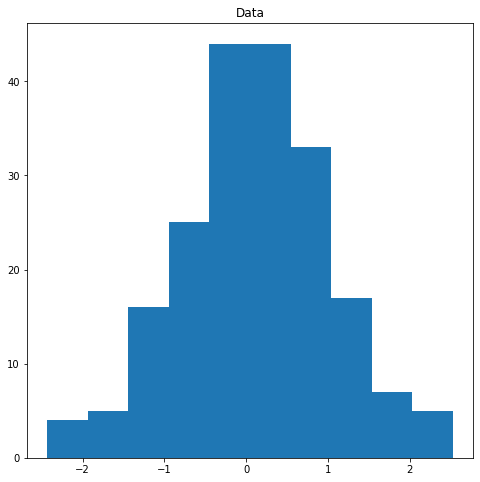

In [63]:
df_outlier.hist(grid=False,figsize=(8,8),bins=10)

In [64]:
df_outlier.hist?

In [65]:
Q1 = df_outlier.Data.quantile(0.25)
Q2 = df_outlier.Data.quantile(0.50)
Q3 = df_outlier.Data.quantile(0.75)
IQR = Q3-Q1 #Interquartile Range

In [66]:
print("Q1: ", round(Q1,3))
print("Q2: ", round(Q2,3))
print("Q3: ", round(Q3,3))
print("IQR: ", round(IQR,3))
print("Alt sınır -- Q1-1.5*IQR: ", round((Q1-1.5*IQR),3))
print("Üst sınır -- Q3+1.5*IQR: ", round((Q3+1.5*IQR),3))

Q1:  -0.461
Q2:  0.13
Q3:  0.709
IQR:  1.17
Alt sınır -- Q1-1.5*IQR:  -2.217
Üst sınır -- Q3+1.5*IQR:  2.464


In [67]:
yeni = pd.DataFrame({"Data":[5]}) 
df_outlier2 = df_outlier.append(yeni, ignore_index = True, sort=True)[df_outlier.columns.tolist()]
df_outlier2.tail()

,Data
196,0.602319
197,0.420282
198,0.810952
199,1.044442
200,5.000000


In [68]:
df_outlier2.describe()

,Data
count,201.000000
mean,0.131034
std,0.973299
min,-2.434838
25%,-0.447129
50%,0.137701
75%,0.740556
max,5.000000


In [69]:
df_outlier2[(df_outlier2.Data < (Q1-1.5*IQR))|(df_outlier2.Data > (Q3+1.5*IQR))] #Aykırı Değerler - Outlier

,Data
5,-2.301539
151,-2.434838
172,2.528326
200,5.000000


In [70]:
len(df_outlier2[(df_outlier2.Data > (Q1-1.5*IQR))&(df_outlier2.Data < Q3+1.5*IQR)]) #Aykırı Değerler Olmayanların Sayısı

197

- *Tekrarlı Verilerin Silinmesi*

In [71]:
df.head(10)

,isim,yas,cinsiyet,meslek,boy
0,ahmet,19,E,Ogrenci,172.0
1,Ayse,26,K,Ogrenci,NaN
2,Kemal,22,E,Ogrenci,180.0
3,Elif,58,K,Yonetici,NaN
4,Mehmet,33,E,Muhendis,175.0
5,Ebru,44,K,Avukat,165.0


In [72]:
df4 = df.append(df.iloc[0], ignore_index=True)
df4.head(10)

,isim,yas,cinsiyet,meslek,boy
0,ahmet,19,E,Ogrenci,172.0
1,Ayse,26,K,Ogrenci,NaN
2,Kemal,22,E,Ogrenci,180.0
3,Elif,58,K,Yonetici,NaN
4,Mehmet,33,E,Muhendis,175.0
5,Ebru,44,K,Avukat,165.0
6,ahmet,19,E,Ogrenci,172.0


In [73]:
df4.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

In [74]:
df4.duplicated().sum()

1

In [75]:
df4[df4.duplicated()]

,isim,yas,cinsiyet,meslek,boy
6,ahmet,19,E,Ogrenci,172.0


In [76]:
df4.yas.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
Name: yas, dtype: bool

In [77]:
df4.duplicated(["yas","cinsiyet"]).sum()

1

- **Kayıp Veriler**

In [78]:
df5 = df.copy()

In [79]:
df5.head(10)

,isim,yas,cinsiyet,meslek,boy
0,ahmet,19,E,Ogrenci,172.0
1,Ayse,26,K,Ogrenci,NaN
2,Kemal,22,E,Ogrenci,180.0
3,Elif,58,K,Yonetici,NaN
4,Mehmet,33,E,Muhendis,175.0
5,Ebru,44,K,Avukat,165.0


In [80]:
df5.describe(include="all")

,isim,yas,cinsiyet,meslek,boy
count,6,6.000000,6,6,4.000000
unique,6,NaN,2,4,NaN
top,Ebru,NaN,E,Ogrenci,NaN
freq,1,NaN,3,3,NaN
mean,NaN,33.666667,NaN,NaN,173.000000
std,NaN,14.895189,NaN,NaN,6.271629
min,NaN,19.000000,NaN,NaN,165.000000
25%,NaN,23.000000,NaN,NaN,170.250000
50%,NaN,29.500000,NaN,NaN,173.500000
75%,NaN,41.250000,NaN,NaN,176.250000


In [81]:
df5.boy.isnull()

0    False
1     True
2    False
3     True
4    False
5    False
Name: boy, dtype: bool

In [82]:
df5.boy.notnull()

0     True
1    False
2     True
3    False
4     True
5     True
Name: boy, dtype: bool

In [83]:
df5.yas.isnull()

0    False
1    False
2    False
3    False
4    False
5    False
Name: yas, dtype: bool

In [84]:
df5[df5.boy.isnull()]

,isim,yas,cinsiyet,meslek,boy
1,Ayse,26,K,Ogrenci,NaN
3,Elif,58,K,Yonetici,NaN


In [85]:
df5.boy.isnull().sum()

2

In [86]:
df5.dropna()

,isim,yas,cinsiyet,meslek,boy
0,ahmet,19,E,Ogrenci,172.0
2,Kemal,22,E,Ogrenci,180.0
4,Mehmet,33,E,Muhendis,175.0
5,Ebru,44,K,Avukat,165.0


In [87]:
df5.dropna(how="any") #how="any"

,isim,yas,cinsiyet,meslek,boy
0,ahmet,19,E,Ogrenci,172.0
2,Kemal,22,E,Ogrenci,180.0
4,Mehmet,33,E,Muhendis,175.0
5,Ebru,44,K,Avukat,165.0


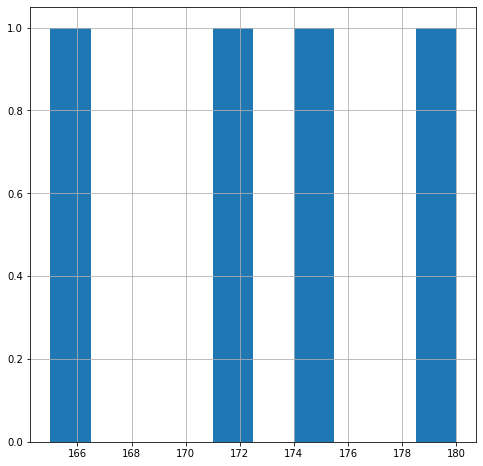

In [88]:
df5.boy.hist(figsize=(8,8))

In [89]:
boy_mean = df5.boy.mean()
boy_mean

173.0

In [90]:
df5.head(10)

,isim,yas,cinsiyet,meslek,boy
0,ahmet,19,E,Ogrenci,172.0
1,Ayse,26,K,Ogrenci,NaN
2,Kemal,22,E,Ogrenci,180.0
3,Elif,58,K,Yonetici,NaN
4,Mehmet,33,E,Muhendis,175.0
5,Ebru,44,K,Avukat,165.0


In [91]:
df5.boy.fillna(df5.boy.mean()) 

0    172.0
1    173.0
2    180.0
3    173.0
4    175.0
5    165.0
Name: boy, dtype: float64

- **Tekrardan İsimlendirme**

In [92]:
df6 = pd.DataFrame({"A": [1, 2, 3], "B": [4, 5, 6]})
df6.head()

,A,B
0,1,4
1,2,5
2,3,6


In [93]:
df6.rename(index={0: "x", 1: "y", 2: "z"})

,A,B
x,1,4
y,2,5
z,3,6


In [94]:
df6.index

RangeIndex(start=0, stop=3, step=1)

In [95]:
df6.rename(index=str).index

Index(['0', '1', '2'], dtype='object')

In [96]:
df6.rename(columns={"A": "x", "B": "y"})

,x,y
0,1,4
1,2,5
2,3,6


In [97]:
df6.rename(str.lower, axis='columns')

,a,b
0,1,4
1,2,5
2,3,6


In [98]:
df6.rename({1: 2, 2: 4}, axis='index')

,A,B
0,1,4
2,2,5
4,3,6


### 1.1.2 Seriler

In [99]:
notlar = [45,50,30,20,95,100,79,82,63,38]
seri = pd.Series(notlar)
seri

0     45
1     50
2     30
3     20
4     95
5    100
6     79
7     82
8     63
9     38
dtype: int64

In [100]:
seri_index = ["Mehmet", "Ebru", "Bekir", "Can", "Cansu", "Kaan", "Süleyman", "Oğuz","Ayşe","Umit"]
seri.index = seri_index
seri.head(10)

Mehmet       45
Ebru         50
Bekir        30
Can          20
Cansu        95
Kaan        100
Süleyman     79
Oğuz         82
Ayşe         63
Umit         38
dtype: int64

- **Sözlük Kullanarak Seri Oluşturma**

In [101]:
i = {'Mehmet':45, 'Ebru':50, 'Bekir':30, 'Can':20, 'Cansu':95, 'Kaan':100, 'Süleyman':79, 'Oğuz':82, 'Ayşe':63, 'Umit':38}
seri2 = pd.Series(i)
seri2.head(10)

Mehmet       45
Ebru         50
Bekir        30
Can          20
Cansu        95
Kaan        100
Süleyman     79
Oğuz         82
Ayşe         63
Umit         38
dtype: int64

In [102]:
# Veri Eklemek
seri2["Ülkü"] = 100
seri2.head(20)

Mehmet       45
Ebru         50
Bekir        30
Can          20
Cansu        95
Kaan        100
Süleyman     79
Oğuz         82
Ayşe         63
Umit         38
Ülkü        100
dtype: int64

In [103]:
yeni = {'Melike':95, 'Ethem':70, 'Aslı':85, 'Enver': np.NaN}
seri3 = seri2.append(pd.Series(yeni))
seri3.head(20)

Mehmet       45.0
Ebru         50.0
Bekir        30.0
Can          20.0
Cansu        95.0
Kaan        100.0
Süleyman     79.0
Oğuz         82.0
Ayşe         63.0
Umit         38.0
Ülkü        100.0
Melike       95.0
Ethem        70.0
Aslı         85.0
Enver         NaN
dtype: float64

In [104]:
seri3.isnull()

Mehmet      False
Ebru        False
Bekir       False
Can         False
Cansu       False
Kaan        False
Süleyman    False
Oğuz        False
Ayşe        False
Umit        False
Ülkü        False
Melike      False
Ethem       False
Aslı        False
Enver        True
dtype: bool

In [105]:
print('Notlar: ', seri3.values)
print('İndeks değerleri: ', seri3.index)

Notlar:  [ 45.  50.  30.  20.  95. 100.  79.  82.  63.  38. 100.  95.  70.  85.
  nan]
İndeks değerleri:  Index(['Mehmet', 'Ebru', 'Bekir', 'Can', 'Cansu', 'Kaan', 'Süleyman', 'Oğuz',
       'Ayşe', 'Umit', 'Ülkü', 'Melike', 'Ethem', 'Aslı', 'Enver'],
      dtype='object')


In [106]:
seri3.name = 'Notlar'
seri3.index.name = 'Ogrenciler'
seri3.head(20)

Ogrenciler
Mehmet       45.0
Ebru         50.0
Bekir        30.0
Can          20.0
Cansu        95.0
Kaan        100.0
Süleyman     79.0
Oğuz         82.0
Ayşe         63.0
Umit         38.0
Ülkü        100.0
Melike       95.0
Ethem        70.0
Aslı         85.0
Enver         NaN
Name: Notlar, dtype: float64

In [107]:
print('Verinin özeti:')
seri3.describe()

Verinin özeti:


count     14.000000
mean      68.000000
std       27.234028
min       20.000000
25%       46.250000
50%       74.500000
75%       92.500000
max      100.000000
Name: Notlar, dtype: float64

In [108]:
# NaN değerin düşürülmesi
seri3.drop('Enver', inplace = True)
seri3.head(20)

Ogrenciler
Mehmet       45.0
Ebru         50.0
Bekir        30.0
Can          20.0
Cansu        95.0
Kaan        100.0
Süleyman     79.0
Oğuz         82.0
Ayşe         63.0
Umit         38.0
Ülkü        100.0
Melike       95.0
Ethem        70.0
Aslı         85.0
Name: Notlar, dtype: float64

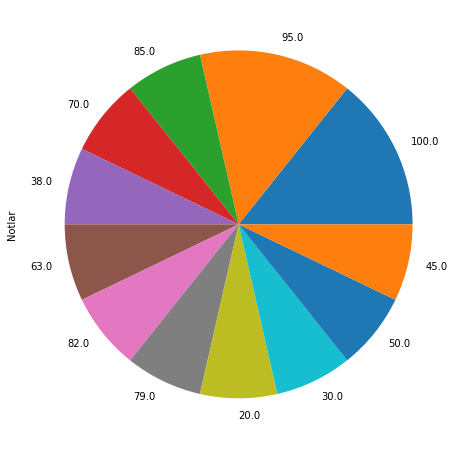

In [109]:
seri3.name = 'Notlar'
plt.figure(figsize= (8,8))
seri3.value_counts().plot(kind = 'pie')
plt.show()

## 1.1.3 Veri Okuma

In [110]:
!more data/table1.cat

x y sigma_y sigma_x rho_xy
203 495 21 5 -0.33
58 173 15 9 0.67
210 479 27 4 -0.02
202 504 14 4 -0.05
198 510 30 11 -0.84
158 416 16 7 -0.69
165 393 14 5 0.30
201 442 25 5 -0.46
157 317 52 5 -0.03
131 311 16 6 0.50
166 400 34 6 0.73
160 337 31 5 -0.52
186 423 42 9 0.90
125 334 26 8 0.40
218 533 16 6 -0.78
146 344 22 5 -0.56
>able1.cat (END)

In [111]:
data = pd.read_csv("./data/table1.cat", delim_whitespace=True)
data.head()

,x,y,sigma_y,sigma_x,rho_xy
0,203,495,21,5,-0.33
1,58,173,15,9,0.67
2,210,479,27,4,-0.02
3,202,504,14,4,-0.05
4,198,510,30,11,-0.84


In [112]:
data = pd.read_table('./data/table1.cat',  delim_whitespace=True)
data.head()

,x,y,sigma_y,sigma_x,rho_xy
0,203,495,21,5,-0.33
1,58,173,15,9,0.67
2,210,479,27,4,-0.02
3,202,504,14,4,-0.05
4,198,510,30,11,-0.84


## Alıştırmalar

**1. Alıştırma**
- Kaynak: https://www.udemy.com/course/python-for-data-science-and-machine-learning-bootcamp/
- Aşağıdaki 1. alıştırma Jose Portilla'nın dersinden alınmıştır. 

In [113]:
import pandas as pd

- **salaries.csv verisi sal olarak okutulsun (dataframe)** 

In [114]:
sal = pd.read_csv("./data/Salaries.csv")
sal.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


- **info() metodu kullanarak dataframe hakkında gerekli bilgileri edinin. Kaç satır? Kaç Kolon?**

In [115]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


- **Ortalama BasePay ne kadar?**

In [116]:
sal["BasePay"].mean()

66325.44884050643

- **Veri setindeki en yüksek OvertimePay değeri ne kadar?**

In [117]:
sal["OvertimePay"].max()

245131.88

- **JOSEPH DRISCOLL adındaki çalışanın iş bilgisi?**

In [118]:
sal[sal["EmployeeName"] == "JOSEPH DRISCOLL"]['JobTitle']

24    CAPTAIN, FIRE SUPPRESSION
Name: JobTitle, dtype: object

- **JOSEPH DRISCOLL ne kadar kazanıyor?**

In [119]:
sal[sal['EmployeeName']=='JOSEPH DRISCOLL']['TotalPayBenefits']

24    270324.91
Name: TotalPayBenefits, dtype: float64

- **En yüksek maaşı alan kişiyi belirle**

In [120]:
sal[sal['TotalPayBenefits']== sal['TotalPayBenefits'].max()]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN


- **En düşük maaşı alan kişi kimdir?**

In [121]:
sal[sal['TotalPayBenefits']== sal['TotalPayBenefits'].min()]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
148653,148654,Joe Lopez,"Counselor, Log Cabin Ranch",0.0,0.0,-618.13,0.0,-618.13,-618.13,2014,NaN,San Francisco,NaN


- **Tüm Çalışanların 2011-2014 yılları arasındaki ortalama (Taban Ücretleri) Base Pay miktarı ne kadar?**

In [122]:
sal.groupby('Year').mean()['BasePay']

Year
2011    63595.956517
2012    65436.406857
2013    69630.030216
2014    66564.421924
Name: BasePay, dtype: float64

- **Kaç tane benzersiz iş var?**

In [123]:
sal['JobTitle'].nunique()

2159

- **En yaygın 5 iş?**

In [124]:
sal['JobTitle'].value_counts().head(5)

Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Name: JobTitle, dtype: int64

**2. Alıştırma**

In [125]:
import pandas as pd

In [126]:
movies = pd.read_excel('./data/movies.xls', sheet_name=None)

In [127]:
movies.keys()

dict_keys(['1900s', '2000s', '2010s'])

In [128]:
movies

{'1900s':                                                   Title  Year  \
 0     Intolerance: Love's Struggle Throughout the Ages   1916   
 1                       Over the Hill to the Poorhouse   1920   
 2                                       The Big Parade   1925   
 3                                           Metropolis   1927   
 4                                        Pandora's Box   1929   
 ...                                                 ...   ...   
 1333                                  Twin Falls Idaho   1999   
 1334                     Universal Soldier: The Return   1999   
 1335                                     Varsity Blues   1999   
 1336                                    Wild Wild West   1999   
 1337                                    Wing Commander   1999   
 
                             Genres Language  Country Content Rating  Duration  \
 0                Drama|History|War      NaN      USA      Not Rated       123   
 1                      Crime|Dra

In [129]:
movies1 = pd.read_excel('./data/movies.xls', sheet_name=0)
movies1.head()

,Title,Year,Genres,Language,Country,Content Rating,Duration,Aspect Ratio,Budget,Gross Earnings,...,Facebook Likes - Actor 1,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score
0,Intolerance: Love's Struggle Throughout the Ages,1916,Drama|History|War,NaN,USA,Not Rated,123,1.33,385907.0,NaN,...,436,22,9.0,481,691,1,10718,88,69.0,8.0
1,Over the Hill to the Poorhouse,1920,Crime|Drama,NaN,USA,NaN,110,1.33,100000.0,3000000.0,...,2,2,0.0,4,0,1,5,1,1.0,4.8
2,The Big Parade,1925,Drama|Romance|War,NaN,USA,Not Rated,151,1.33,245000.0,NaN,...,81,12,6.0,108,226,0,4849,45,48.0,8.3
3,Metropolis,1927,Drama|Sci-Fi,German,Germany,Not Rated,145,1.33,6000000.0,26435.0,...,136,23,18.0,203,12000,1,111841,413,260.0,8.3
4,Pandora's Box,1929,Crime|Drama|Romance,German,Germany,Not Rated,110,1.33,NaN,9950.0,...,426,20,3.0,455,926,1,7431,84,71.0,8.0


In [130]:
movies1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Title                        1338 non-null   object 
 1   Year                         1338 non-null   int64  
 2   Genres                       1338 non-null   object 
 3   Language                     1334 non-null   object 
 4   Country                      1338 non-null   object 
 5   Content Rating               1316 non-null   object 
 6   Duration                     1338 non-null   int64  
 7   Aspect Ratio                 1308 non-null   float64
 8   Budget                       1281 non-null   float64
 9   Gross Earnings               1086 non-null   float64
 10  Director                     1338 non-null   object 
 11  Actor 1                      1338 non-null   object 
 12  Actor 2                      1338 non-null   object 
 13  Actor 3           

In [131]:
movies1.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Title,1338,1310,Halloween,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,1338,NaN,NaN,NaN,1987.29,14.1249,1916,1982,1993,1997,1999
Genres,1338,430,Drama,62,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Language,1334,15,English,1290,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country,1338,28,USA,1073,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Content Rating,1316,13,R,650,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration,1338,NaN,NaN,NaN,113.071,27.434,25,96,107,123,330
Aspect Ratio,1308,NaN,NaN,NaN,1.98775,0.310047,1.18,1.85,1.85,2.35,2.76
Budget,1281,NaN,NaN,NaN,2.71206e+07,8.46694e+07,7000,4e+06,1.4e+07,3.3e+07,2.4e+09
Gross Earnings,1086,NaN,NaN,NaN,4.75274e+07,6.11316e+07,5494,8.1828e+06,2.72408e+07,6.3585e+07,6.58672e+08


In [132]:
movies1[["Language","Title"]]

,Language,Title
0,NaN,Intolerance: Love's Struggle Throughout the Ages
1,NaN,Over the Hill to the Poorhouse
2,NaN,The Big Parade
3,German,Metropolis
4,German,Pandora's Box
...,...,...
1333,English,Twin Falls Idaho
1334,English,Universal Soldier: The Return
1335,English,Varsity Blues
1336,English,Wild Wild West


In [133]:
movies1["Language"].value_counts()

English       1290
French          11
Japanese         6
German           6
Italian          5
Spanish          3
Danish           2
Portuguese       2
Dutch            2
Cantonese        2
Swedish          1
None             1
Russian          1
Hindi            1
Persian          1
Name: Language, dtype: int64

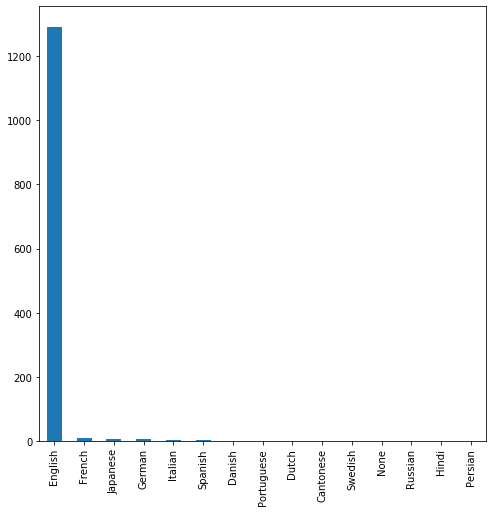

In [134]:
movies1["Language"].value_counts().plot(kind='bar', figsize=(8,8))

In [135]:
movies1["Country"].value_counts()

USA               1073
UK                 130
France              26
Canada              25
Australia           18
Germany             12
Italy               11
Japan                9
Spain                4
Netherlands          3
Hong Kong            3
Denmark              3
West Germany         3
Brazil               2
Iran                 2
New Zealand          2
Aruba                1
Mexico               1
Libya                1
South Korea          1
Czech Republic       1
Norway               1
China                1
Peru                 1
Soviet Union         1
Switzerland          1
Sweden               1
India                1
Name: Country, dtype: int64

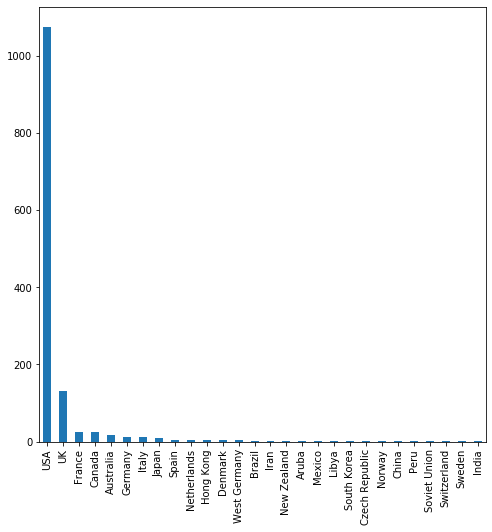

In [136]:
movies1["Country"].value_counts().plot(kind='bar', figsize=(8,8))

In [137]:
movies1["Genres"].value_counts()

Drama                                   62
Comedy|Drama                            51
Comedy                                  48
Comedy|Drama|Romance                    46
Drama|Romance                           39
                                        ..
Adventure|Comedy|Music|Sci-Fi            1
Comedy|Horror|Thriller                   1
Crime|Drama|Sport                        1
Comedy|Drama|Musical|Romance|Western     1
Crime|Horror|Thriller                    1
Name: Genres, Length: 430, dtype: int64

In [138]:
movies1["Genres"].value_counts()[:20]

Drama                               62
Comedy|Drama                        51
Comedy                              48
Comedy|Drama|Romance                46
Drama|Romance                       39
Action|Adventure|Thriller           28
Crime|Drama                         27
Comedy|Romance                      23
Crime|Drama|Thriller                20
Comedy|Crime                        17
Horror                              14
Crime|Drama|Mystery|Thriller        13
Action|Crime|Drama|Thriller         13
Fantasy|Horror                      13
Action|Sci-Fi                       13
Drama|Thriller                      12
Horror|Thriller                     12
Action|Adventure|Sci-Fi             11
Action|Adventure|Sci-Fi|Thriller    11
Drama|Mystery|Thriller              11
Name: Genres, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11b989160>],
      dtype=object)

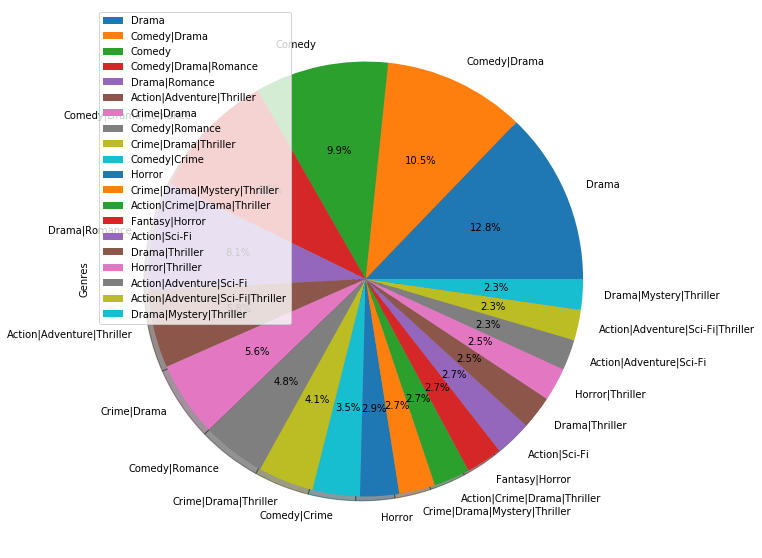

In [139]:
movies1["Genres"].value_counts()[:20].plot.pie(subplots=True,figsize=(10,10),autopct='%1.1f%%',
                                              legend=True, shadow=True, startangle=0)

In [140]:
movies1.Director.value_counts()

Steven Spielberg        14
Martin Scorsese         13
John Carpenter          12
Spike Lee               10
Francis Ford Coppola    10
                        ..
Harry Elfont             1
Anthony Mann             1
Thomas Vinterberg        1
Brenda Chapman           1
Iain Softley             1
Name: Director, Length: 750, dtype: int64

Text(0.5, 0, 'Yıl')

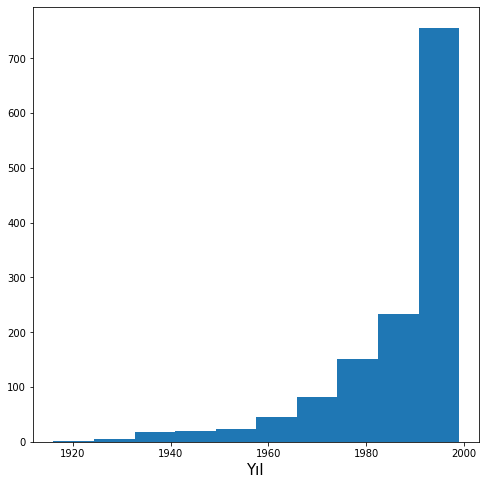

In [141]:
ax = movies1.Year.hist(figsize=(8,8), grid=False)
ax.set_xlabel("Yıl", fontsize=15)

Text(0, 0.5, 'Gross Earnings')

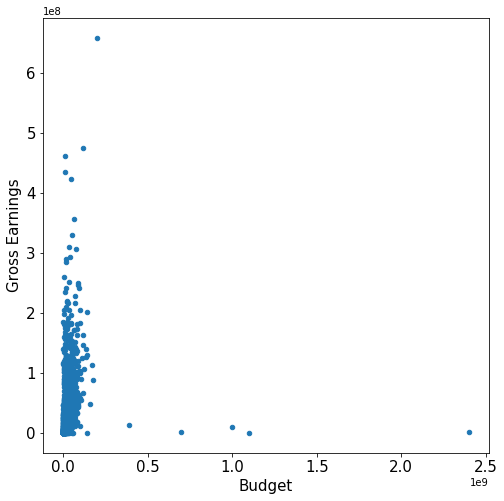

In [142]:
ax = movies1.plot.scatter(x="Budget", y="Gross Earnings", fontsize=15, figsize=(8,8))
ax.set_xlabel("Budget", fontsize=15)
ax.set_ylabel("Gross Earnings", fontsize=15)

In [143]:
movies1[movies1['Budget'] == movies1['Budget'].max()]

,Title,Year,Genres,Language,Country,Content Rating,Duration,Aspect Ratio,Budget,Gross Earnings,...,Facebook Likes - Actor 1,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score
986,Princess Mononoke,1997,Adventure|Animation|Fantasy,Japanese,Japan,PG-13,134,1.85,2.400000e+09,2298191.0,...,893,851,745.0,2710,11000,0,221552,570,174.0,8.4


In [144]:
movies1[movies1['Budget'] == movies1['Budget'].min()]

,Title,Year,Genres,Language,Country,Content Rating,Duration,Aspect Ratio,Budget,Gross Earnings,...,Facebook Likes - Actor 1,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score
622,El Mariachi,1992,Action|Crime|Drama|Romance|Thriller,Spanish,USA,R,81,1.37,7000.0,2040920.0,...,121,20,6.0,147,0,0,52055,130,56.0,6.9


Text(0, 0.5, 'Gross Earnings')

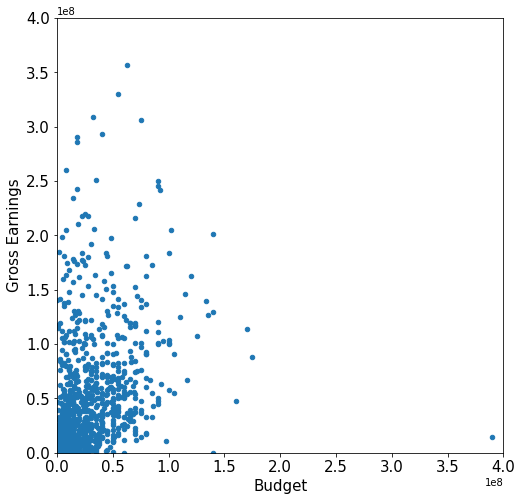

In [145]:
ax = movies1.plot.scatter(x="Budget", y="Gross Earnings", fontsize=15, figsize=(8,8),\
                         xlim=(0,4e8), ylim=(0,4e8))

ax.set_xlabel("Budget", fontsize=15)
ax.set_ylabel("Gross Earnings", fontsize=15)

In [146]:
movies1[["Budget","Gross Earnings","IMDB Score","Reviews by Crtiics","User Votes","Reviews by Users"]].corr()

,Budget,Gross Earnings,IMDB Score,Reviews by Crtiics,User Votes,Reviews by Users
Budget,1.000000,0.077605,-0.001474,0.087358,0.070121,0.081506
Gross Earnings,0.077605,1.000000,0.246150,0.420706,0.534089,0.428937
IMDB Score,-0.001474,0.246150,1.000000,0.442658,0.463297,0.377119
Reviews by Crtiics,0.087358,0.420706,0.442658,1.000000,0.608385,0.737307
User Votes,0.070121,0.534089,0.463297,0.608385,1.000000,0.809801
Reviews by Users,0.081506,0.428937,0.377119,0.737307,0.809801,1.000000


- **Excel Sheet'leri Birleştirme**

In [147]:
df = pd.concat(pd.read_excel('./data/movies.xls', sheet_name=None), ignore_index=True)

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5042 entries, 0 to 5041
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Title                        5042 non-null   object 
 1   Year                         4935 non-null   float64
 2   Genres                       5042 non-null   object 
 3   Language                     5031 non-null   object 
 4   Country                      5038 non-null   object 
 5   Content Rating               4740 non-null   object 
 6   Duration                     5028 non-null   float64
 7   Aspect Ratio                 4714 non-null   float64
 8   Budget                       4551 non-null   float64
 9   Gross Earnings               4159 non-null   float64
 10  Director                     4938 non-null   object 
 11  Actor 1                      5035 non-null   object 
 12  Actor 2                      5029 non-null   object 
 13  Actor 3           

## Kaynaklar:
    - https://pandas.pydata.org/pandas-docs/stable/reference/frame.html
    - Statistics and Machine Learning in Python (by Edouard Duchesnay, Tommy Löfstedt)
    - https://www.udemy.com/course/python-for-data-science-and-machine-learning-bootcamp/
    - https://www.dataquest.io/blog/excel-and-pandas/
    